In [19]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### 1.0. Pedestrian Data

#### 1.1. Data Load

In [2]:
df = pd.read_csv('../data/pedestrian.csv', index_col=[0])
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d %H:%M:%S')

df = df[
    (df.Sensor == 'Southern Cross Station') & 
    (df.Date >= '2016-07-01')
].reset_index(drop=True)

df_forecast = df.loc[(df.Date <= "2016-07-31"), ['Date', 'Count']].groupby('Date').sum()
df_forecast.index.freq = 'D'

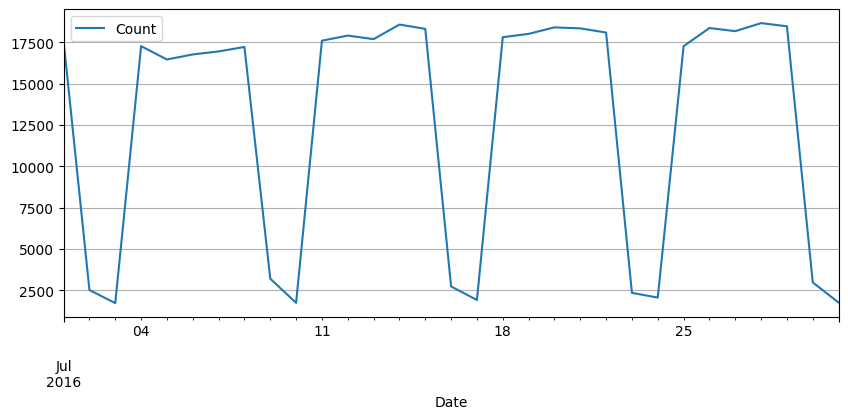

In [5]:
df_forecast.plot(grid=2,figsize=(10,4));

#### 1.2. Fit Estimator & Forecast

In [6]:
est = ExponentialSmoothing(
    df_forecast['Count'],
    trend='Add',
    seasonal='Add'
).fit()

forecast = est.predict(end='2016-08-21')

est.summary()

Dep. Variable:,Count,No. Observations:,31
Model:,ExponentialSmoothing,SSE,5915270.235
Optimized:,True,AIC,398.931
Trend:,Additive,BIC,414.705
Seasonal:,Additive,AICC,420.343
Seasonal Periods:,7,Date:,"Sat, 17 Jun 2023"
Box-Cox:,False,Time:,19:39:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7208189,alpha,True
smoothing_trend,0.0508606,beta,True


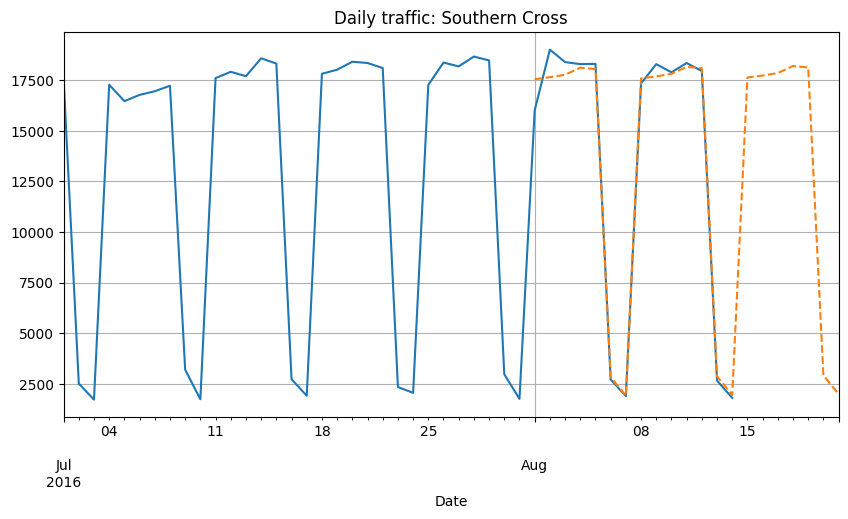

In [7]:
test = df.loc[(df.Date <= '2016-08-14') & (df.Date >= '2016-07-01'), ['Date', 'Count']].groupby('Date').sum()

test.plot(figsize=(10,5), legend='', title="Daily traffic: Southern Cross")
forecast.plot(linestyle='--', grid=2);

### 2.0. Tourism Data

#### 2.1. Data Load

In [9]:
df = pd.read_csv('../data/tourism.csv', index_col=[0])

df = df[df.Purpose == 'Holiday']

df['Quarter'] = df.Quarter.apply(lambda x: x.replace(' ', '-'))

df['Quarter'] = pd.PeriodIndex(df.Quarter, freq='Q').to_timestamp()

df = df[['Quarter', 'Trips']].groupby('Quarter').sum().reset_index()

df = df.set_index('Quarter')

df.index.freq = 'QS-OCT'

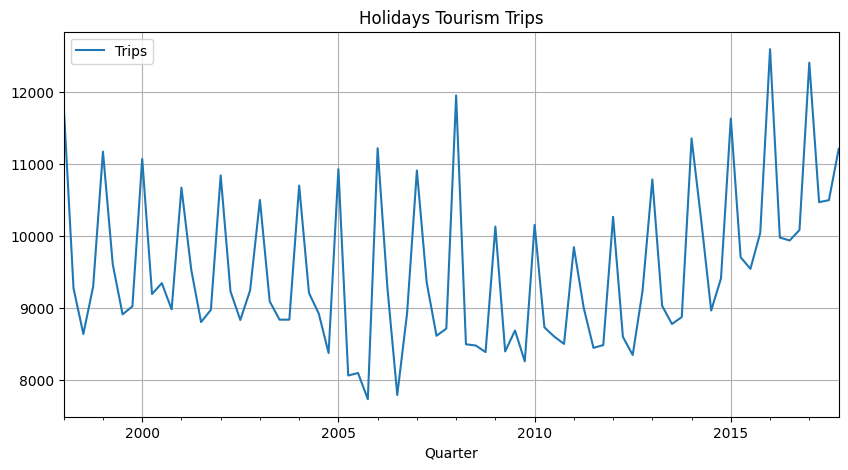

In [11]:
df.plot(kind='line', figsize=(10,5), grid=2, title='Holidays Tourism Trips');

#### 2.2. Fit Estimator & Forecast

In [12]:
est = ExponentialSmoothing(
    df['Trips'],
    trend='Mul',
    seasonal='Add',
).fit()

est.summary()

Dep. Variable:,Trips,No. Observations:,80
Model:,ExponentialSmoothing,SSE,14530392.690
Optimized:,True,AIC,984.778
Trend:,Multiplicative,BIC,1003.834
Seasonal:,Additive,AICC,987.967
Seasonal Periods:,4,Date:,"Sat, 17 Jun 2023"
Box-Cox:,False,Time:,19:40:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2171429,alpha,True
smoothing_trend,0.1336264,beta,True


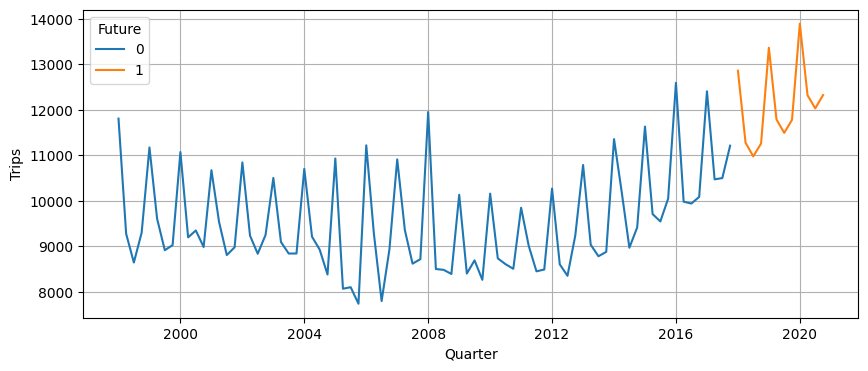

In [22]:
df['Future'] = 0

forecast = est.predict(end='2020-10-01')
forecast = pd.DataFrame(forecast).rename(columns={0:'Trips'})
forecast['Future'] = 1

forecast = pd.concat([df, pd.DataFrame(forecast).rename(columns={0:'Trips'})], axis=0)

fig, _ = subplots(figsize=(10,4))
ax = sns.lineplot(forecast.reset_index(), x='index', y='Trips', hue='Future');
ax.set_xlabel('Quarter')
ax.grid(2)
